In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
raw_mail_data = pd.read_csv('spam.csv')
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
mail_data = raw_mail_data.where(pd.notnull(raw_mail_data),'')

In [5]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

In [7]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
X = mail_data['Message']
Y = mail_data['Category']

In [9]:
X_Train,X_test,Y_Train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [10]:
feature_extraction= TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [11]:
feature_extraction = TfidfVectorizer(lowercase=True) 
feature_extraction

TfidfVectorizer()

In [12]:
X_train_feature = feature_extraction.fit_transform(X_Train)
X_test_feature = feature_extraction.transform(X_test)
Y_Train = Y_Train.astype('int')
Y_test = Y_test.astype('int')

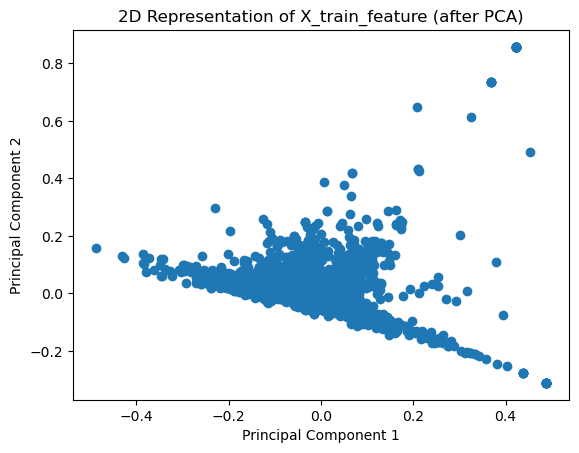

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_feature.toarray())
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.title('2D Representation of X_train_feature (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train_feature,Y_Train)

LogisticRegression()

In [16]:
prediction_on_Training_Data = model.predict(X_train_feature)
accuracy_on_training_data = accuracy_score(Y_Train,prediction_on_Training_Data)

In [17]:
prediction_on_Test_Data = model.predict(X_test_feature)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_Test_Data)
accuracy_on_test_data * 100

97.75784753363229

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(Y_test,prediction_on_Test_Data))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       155
           1       0.97      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [20]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBClassifier

In [22]:
model = XGBClassifier(n_estimators=250)
model.fit(X_train_feature,Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
xg_pred = model.predict(X_test_feature)

In [24]:
accuracy = accuracy_score(Y_test,xg_pred)

In [25]:
accuracy*100

97.57847533632287

In [26]:
print(classification_report(Y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

